# Data Sourcing
In this section we will import all the libraries/packages and the data from the source

In [73]:
#Importing Libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
#Importing the data source file and reading the data

loan_dataset = pd.read_csv("loan.csv")


In [75]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [76]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [77]:
loan_dataset.shape

(39717, 111)

In [78]:
#Detecting the null values and columns
#we can see that from the shape and isnull function, we have some columns which are null
loan_dataset.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning and Transformations
In this section we will clean our data so that it will be fit for the analysis and we have to also make some transformations.
#### Note: Transformations will be applied throughtout the analysis as we slice and dice the data and come to conclusions 

In [79]:
# Removing the columns which are having null values
loan_dataset.dropna(axis=1,how='all',inplace=True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [80]:
#Now we will see if there are any duplicates
loan_dataset.drop_duplicates(keep='first',inplace=True)
loan_dataset.head()
#From the data we can see that no unique values are there, so we probably should go ahead for further cleaning

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [81]:
# We have to also drop the values which are constant across all the rows
#creating a function to remove constant value column across dataset using nunique method
df = pd.DataFrame()
def remove_constant_value_column(df):
    return [c1 for c1 in df.columns if df[c1].nunique()==1]

drop_constant_column = remove_constant_value_column(loan_dataset)
loan_dataset.drop(drop_constant_column,axis=1,inplace=True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### The end goal of this case study is to detect the parameters or indicators which point us to likely default the loans.
#### The loan is already approved as we can see from the case study, so no need to have the customer behaviour variables inside the dataset apart from few variables which can be used to see any chances which likely lead to possible defaulters. Thus we have three categories to be considered in the analysis ( Applicant related, Loan characteristics and Post approval fields)
##### The associated fields for the above scenario are as follows:
###### 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status','purpose','dti','delinq_2yrs','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d'


In [82]:
#keeping only above columns in the dataset
loan_dataset=loan_dataset.loc[:,['loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','dti','delinq_2yrs','revol_bal','out_prncp','total_pymnt','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'
]]
loan_dataset.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,...,0,13648,0.00,5863.155187,5000.00,0.00,0.00,0.00,Jan-15,171.62
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,0,1687,0.00,1008.710000,456.46,0.00,117.08,1.11,Apr-13,119.66
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,...,0,2956,0.00,3005.666844,2400.00,0.00,0.00,0.00,Jun-14,649.91
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,0,5598,0.00,12231.890000,10000.00,16.97,0.00,0.00,Jan-15,357.48
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,...,0,27783,524.06,3513.330000,2475.94,0.00,0.00,0.00,May-16,67.79


#### We have to only focus on Loan status with Fully Paid and Charged off as we can't predict from the current status

In [83]:
# Remove current status rows from the dataframe
loan_dataset = loan_dataset[loan_dataset.loan_status!='Current']

loan_dataset.head()


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,...,0,13648,0.0,5863.155187,5000.00,0.00,0.00,0.00,Jan-15,171.62
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,0,1687,0.0,1008.710000,456.46,0.00,117.08,1.11,Apr-13,119.66
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,...,0,2956,0.0,3005.666844,2400.00,0.00,0.00,0.00,Jun-14,649.91
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,0,5598,0.0,12231.890000,10000.00,16.97,0.00,0.00,Jan-15,357.48
5,5000,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,...,0,7963,0.0,5632.210000,5000.00,0.00,0.00,0.00,Jan-15,161.03


In [84]:
# We can see that emp_length, last_pymnt_d have some missing values
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   term                     38577 non-null  object 
 2   int_rate                 38577 non-null  object 
 3   grade                    38577 non-null  object 
 4   sub_grade                38577 non-null  object 
 5   emp_length               37544 non-null  object 
 6   home_ownership           38577 non-null  object 
 7   annual_inc               38577 non-null  float64
 8   verification_status      38577 non-null  object 
 9   issue_d                  38577 non-null  object 
 10  loan_status              38577 non-null  object 
 11  purpose                  38577 non-null  object 
 12  dti                      38577 non-null  float64
 13  delinq_2yrs              38577 non-null  int64  
 14  revol_bal             

In [85]:
# Replaced the NA values with 0 as we are converting the employee length in numeric and extracting numeric values from employee length
loan_dataset.emp_length.fillna(0,inplace=True)
#loan_dataset.info()
loan_dataset['emp_length']=loan_dataset.emp_length.str.extract('(\d+)')
loan_dataset.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,delinq_2yrs,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000,36 months,10.65%,B,B2,10,RENT,24000.0,Verified,Dec-11,...,0,13648,0.0,5863.155187,5000.00,0.00,0.00,0.00,Jan-15,171.62
1,2500,60 months,15.27%,C,C4,1,RENT,30000.0,Source Verified,Dec-11,...,0,1687,0.0,1008.710000,456.46,0.00,117.08,1.11,Apr-13,119.66
2,2400,36 months,15.96%,C,C5,10,RENT,12252.0,Not Verified,Dec-11,...,0,2956,0.0,3005.666844,2400.00,0.00,0.00,0.00,Jun-14,649.91
3,10000,36 months,13.49%,C,C1,10,RENT,49200.0,Source Verified,Dec-11,...,0,5598,0.0,12231.890000,10000.00,16.97,0.00,0.00,Jan-15,357.48
5,5000,36 months,7.90%,A,A4,3,RENT,36000.0,Source Verified,Dec-11,...,0,7963,0.0,5632.210000,5000.00,0.00,0.00,0.00,Jan-15,161.03


In [86]:
#Lets Remove % in int_rate column
loan_dataset['int_rate'] = loan_dataset.int_rate.apply(str)
loan_dataset['int_rate'] = loan_dataset['int_rate'].str.rstrip('%')

#lets convert some of the fields datatype and derive new columns
loan_dataset['int_rate'] = loan_dataset['int_rate'].apply(pd.to_numeric)
loan_dataset['issue_d'] = pd.to_datetime(loan_dataset['issue_d'], format='%b-%y')
loan_dataset['year']=loan_dataset['issue_d'].dt.year
loan_dataset['month']=loan_dataset['issue_d'].dt.month
loan_dataset['month_year']=loan_dataset['month'].map(str)+' - '+loan_dataset['year'].map(str)
loan_dataset.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,year,month,month_year
0,5000,36 months,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,...,5863.155187,5000.00,0.00,0.00,0.00,Jan-15,171.62,2011,12,12 - 2011
1,2500,60 months,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,...,1008.710000,456.46,0.00,117.08,1.11,Apr-13,119.66,2011,12,12 - 2011
2,2400,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,...,3005.666844,2400.00,0.00,0.00,0.00,Jun-14,649.91,2011,12,12 - 2011
3,10000,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,...,12231.890000,10000.00,16.97,0.00,0.00,Jan-15,357.48,2011,12,12 - 2011
5,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,...,5632.210000,5000.00,0.00,0.00,0.00,Jan-15,161.03,2011,12,12 - 2011


## Univariate Analysis

In [87]:
loan_dataset["loan_amnt"].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

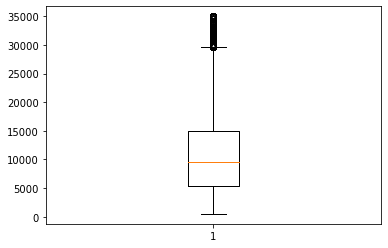

In [88]:
plt.boxplot(loan_dataset["loan_amnt"])
plt.show()
#Clearly we can see that the distribution is continuous, so no need to remove the outliers

In [89]:
loan_dataset["int_rate"].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

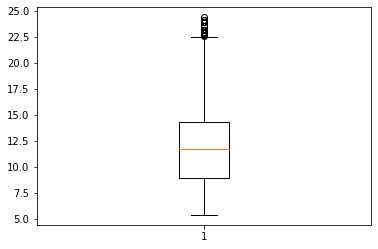

In [90]:
plt.boxplot(loan_dataset.int_rate)
plt.show()

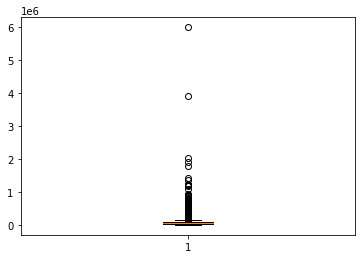

In [91]:
plt.boxplot(loan_dataset.annual_inc)
plt.show()
# we need to remove the outliers in this annual income

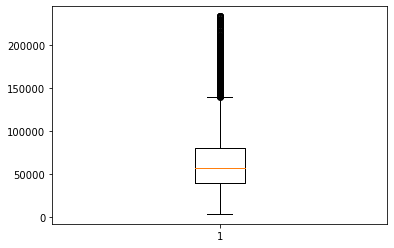

In [92]:
# Removing outliers
loan_dataset = (loan_dataset[loan_dataset["annual_inc"] <= loan_dataset["annual_inc"].quantile(0.99)])
plt.boxplot(loan_dataset.annual_inc)
plt.show()

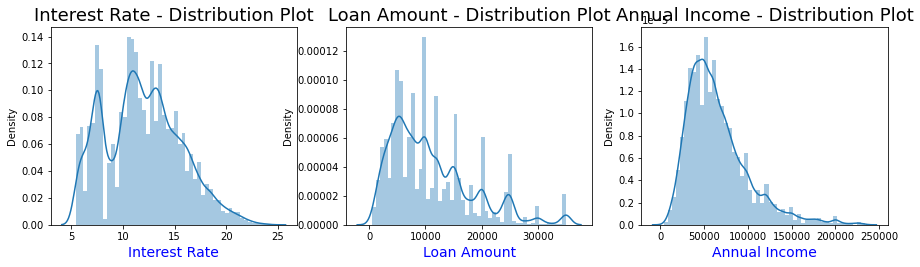

In [93]:
# Lets see the distribution for loan amount, interest rates and annual income
plt.figure(figsize=(15,8))
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_dataset['int_rate'])
ax.set_title('Interest Rate - Distribution Plot',fontsize=18,color='black')
ax.set_xlabel('Interest Rate',fontsize=14,color='blue')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_dataset['loan_amnt'])
ax.set_title('Loan Amount - Distribution Plot',fontsize=18,color='black')
ax.set_xlabel('Loan Amount',fontsize=14,color='blue')

# subplot 3
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_dataset['annual_inc'])
ax.set_title('Annual Income - Distribution Plot',fontsize=18,color='black')
ax.set_xlabel('Annual Income',fontsize=14,color='blue')

plt.show()

#Conclusions:
#1. We can see that most of the interest rates for loans are below 15%
#2. maximum loan amounts are between 3000 to 12000
#3. Most of the borrowers are having annual income between 25000 to 75000 bucket

In [94]:
loan_dataset.reset_index()
loan_dataset.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,year,month,month_year
0,5000,36 months,10.65,B,B2,10,RENT,24000.0,Verified,2011-12-01,...,5863.155187,5000.00,0.00,0.00,0.00,Jan-15,171.62,2011,12,12 - 2011
1,2500,60 months,15.27,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,...,1008.710000,456.46,0.00,117.08,1.11,Apr-13,119.66,2011,12,12 - 2011
2,2400,36 months,15.96,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,...,3005.666844,2400.00,0.00,0.00,0.00,Jun-14,649.91,2011,12,12 - 2011
3,10000,36 months,13.49,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,...,12231.890000,10000.00,16.97,0.00,0.00,Jan-15,357.48,2011,12,12 - 2011
5,5000,36 months,7.90,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,...,5632.210000,5000.00,0.00,0.00,0.00,Jan-15,161.03,2011,12,12 - 2011


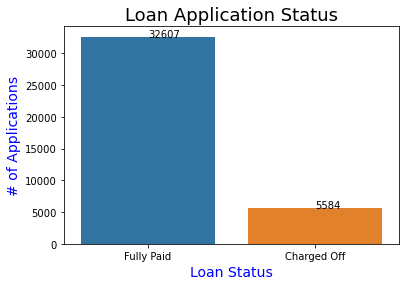

In [95]:
# Lets se univarite analysis on Loan Status
ax = sns.countplot(x = 'loan_status', data = loan_dataset)
ax.set_title('Loan Application Status',fontsize=18,color='black')
ax.set_xlabel('Loan Status',fontsize=14,color='blue')
ax.set_ylabel('# of Applications',fontsize=14,color = 'blue')  
a=loan_dataset['loan_status'].value_counts()
for i, b in a.reset_index().iterrows():
    ax.text(i, b.loan_status , b.loan_status, color='black')

# Conclusion:
# We can see that almost 17% loans are charged off

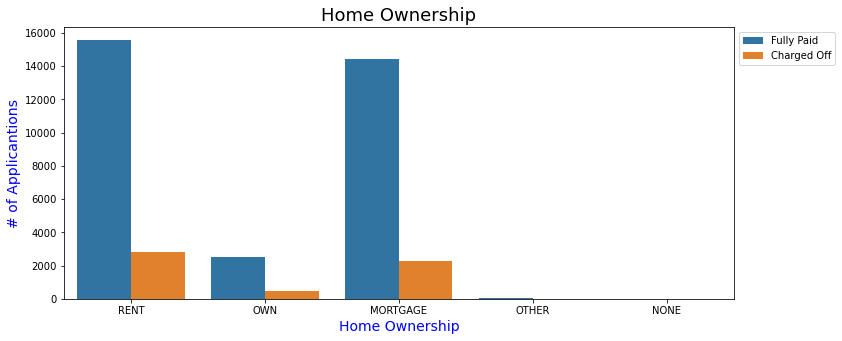

In [96]:
# Now we will analyze the loan status against home ownership
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'home_ownership', data = loan_dataset,hue='loan_status')
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Home Ownership',fontsize=18,color='black')
ax.set_xlabel('Home Ownership',fontsize=14,color='blue')
ax.set_ylabel('# of Applicantions',fontsize=14,color = 'blue')   
plt.show()

# Conclusion:
# The charged off is more in RENT and MORTGAGE category compared to owned as these applicants are more.

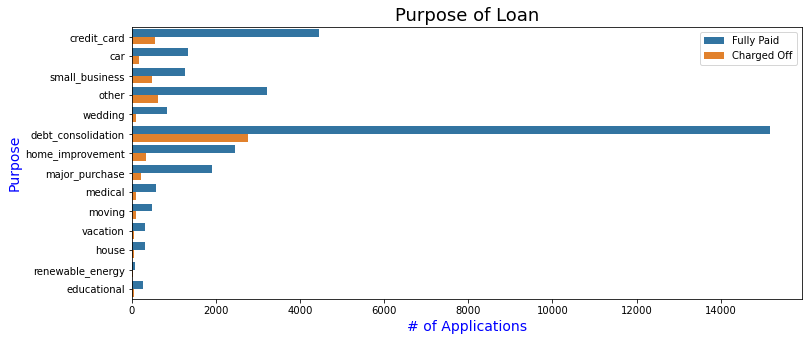

In [97]:
# Now we will analyze the loan status against purpose
plt.figure(figsize=(12,5))
ax = sns.countplot(y = 'purpose', data = loan_dataset,hue='loan_status')
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Purpose of Loan',fontsize=18,color='black')
ax.set_xlabel('# of Applications',fontsize=14,color='blue')
ax.set_ylabel('Purpose',fontsize=14,color = 'blue')   
plt.show()

# Conclusion:
# Most of the borrowers taken loan for debt_consoldation and for credit card and thus charged off is also high for these purpose.

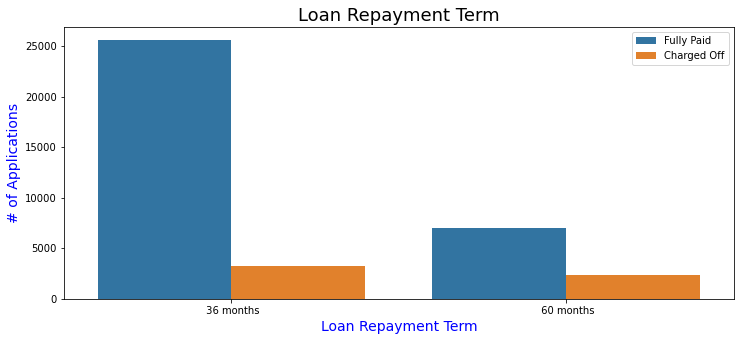

In [98]:
# Now we will analyze the loan status against Loan Repayment Term
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'term', data = loan_dataset,hue='loan_status')
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Loan Repayment Term',fontsize=18,color='black')
ax.set_ylabel('# of Applications',fontsize=14,color='blue')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'blue')   
plt.show()

# Conclusion:
# Charged off is more for 36 months compared to 60 months, the time taken to pay back the loan

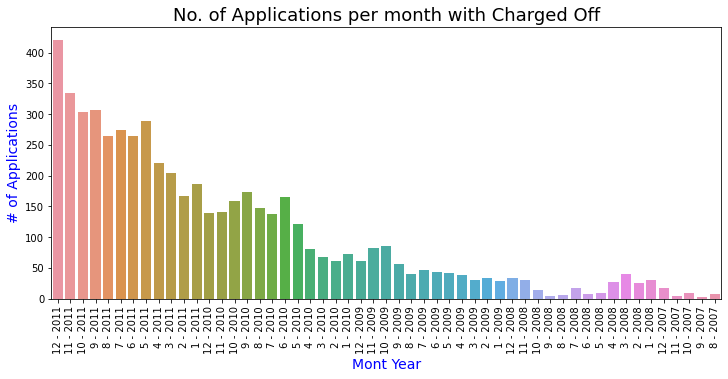

In [108]:
# Now we will analyze how much per month the loan was provided

Charged_off_data = loan_dataset[loan_dataset.loan_status=="Charged Off"]
#Charged_off_data["loan_amnt"] = Charged_off_data["loan_amnt"].apply(np.mean)
plt.figure(figsize=(12,5))
ax = sns.countplot(x = 'month_year', data = Charged_off_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('No. of Applications per month with Charged Off',fontsize=18,color='black')
ax.set_ylabel('# of Applications',fontsize=14,color='blue')
ax.set_xlabel('Month Year',fontsize=14,color = 'blue')   
plt.show()

# Conlusion:
#1. For Charged off- we can see that number of applicants are increasing from October to December every year so the deafults occured in those months



In [156]:
# Lets create some binnings/groupings for analysis
loan_dataset['int_rate_grp'] = pd.cut(loan_dataset['int_rate'], bins=4,precision =0,labels=['5%-10%','11%-15%','16%-20%','21%-25%'])
loan_dataset['annual_inc_grp'] = pd.cut(loan_dataset['annual_inc'], bins=6,precision =0,labels =['0k-30k','31k-60k','61k-90k','91k-120k','121k-150k','151k +'])
loan_dataset['loan_amnt_grp'] = pd.cut(loan_dataset['loan_amnt'], bins=7,precision =0,labels=['0-5k','6k-10k','11k-15k','16k-20k','21k-25k','26k-30k','31k-35k'])
loan_dataset['dti_grp'] = pd.cut(loan_dataset['dti'], bins=5,precision =0,labels=['0-6','7-12','13-18','19-24','25-30'])

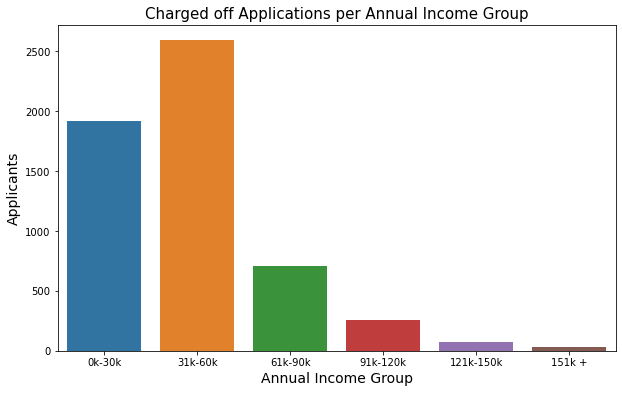

In [142]:
#Now we will plot the Charged off Applications per Annual Group
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_grp', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])
ax.set_title('Charged off Applications per Annual Income Group',fontsize=15,color='black')
ax.set_ylabel('Applicants',fontsize=14,color='black')
ax.set_xlabel('Annual Income Group',fontsize=14,color='black')
plt.show()

#We can see that the annual income less than 60k will be more chances of likely to default. Maximum likely to default are in 31-60 K range

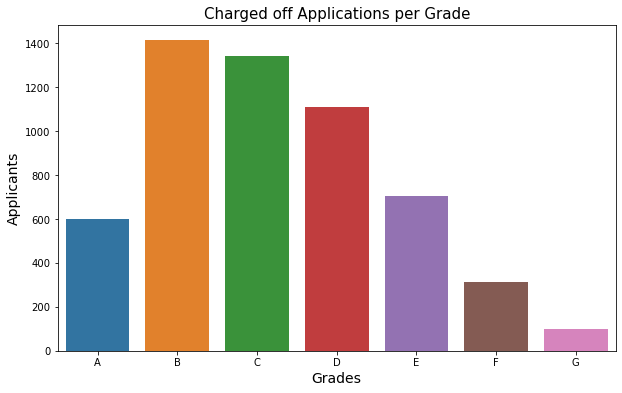

In [143]:
# Now we will see the gradewise applications for charged off category
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] ,data = loan_dataset[loan_dataset.loan_status == 'Charged Off'])
ax.set_title('Charged off Applications per Grade',fontsize=15,color='black')
ax.set_ylabel('Applicants',fontsize=14,color='black')
ax.set_xlabel('Grades',fontsize=14,color='black')
plt.show()

# B grade is the highest grade who likely to default

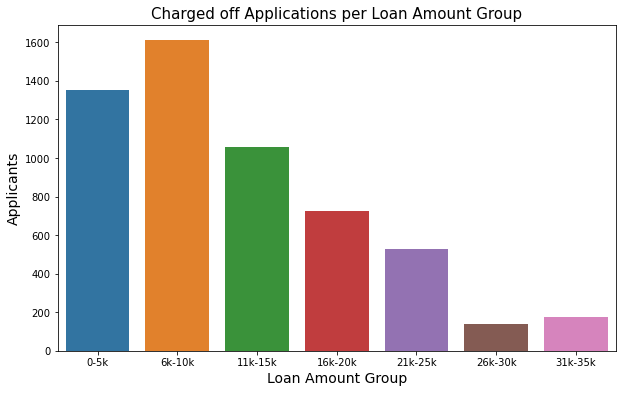

In [145]:
# Now we will see loan amount group for charged off applications
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='loan_amnt_grp', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])
ax.set_title('Charged off Applications per Loan Amount Group',fontsize=15,color='black')
ax.set_ylabel('Applicants',fontsize=14,color='black')
ax.set_xlabel('Loan Amount Group',fontsize=14,color='black')
plt.show()
#The interesting fact is those who have taken the loan between 6k-10k will  likely to default

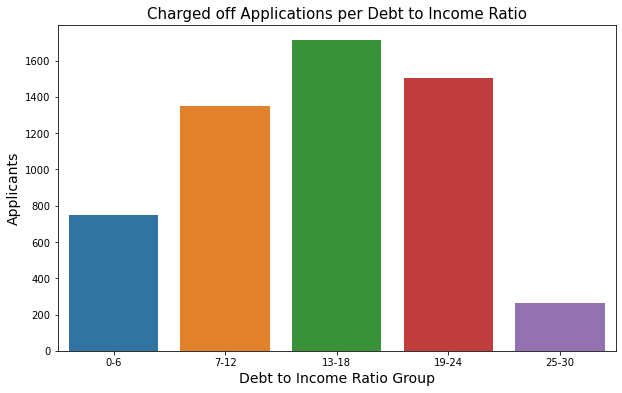

In [157]:
# Lets see the Debt to Income Ratio for borrowers who likely to default
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='dti_grp', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])
ax.set_title('Charged off Applications per Debt to Income Ratio',fontsize=15,color='black')
ax.set_ylabel('Applicants',fontsize=14,color='black')
ax.set_xlabel('Debt to Income Ratio Group',fontsize=14,color='black')
plt.show()
#Most of the applicants who likely to default are fall under 13-18 DTI ratio 

## Bivariate Analysis
#### We will now perform the bivariate analysis to get some interesting insights on the defaults

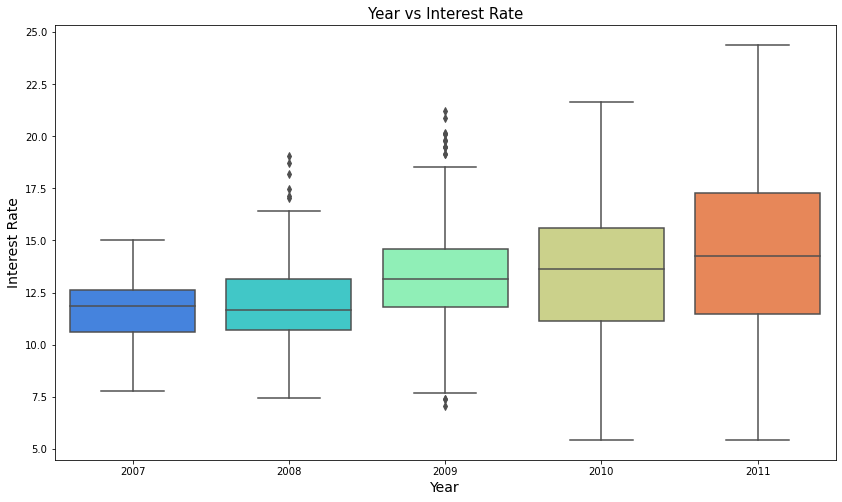

In [148]:
# Lets see the Year Vs Interest Rate variation on defaults
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='year', data =loan_dataset[loan_dataset.loan_status == 'Charged Off'],palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'black')
ax.set_xlabel('Year',fontsize=14,color = 'black')
plt.show()
# Plot shows intrest rate is increasing slowly with increase in year.

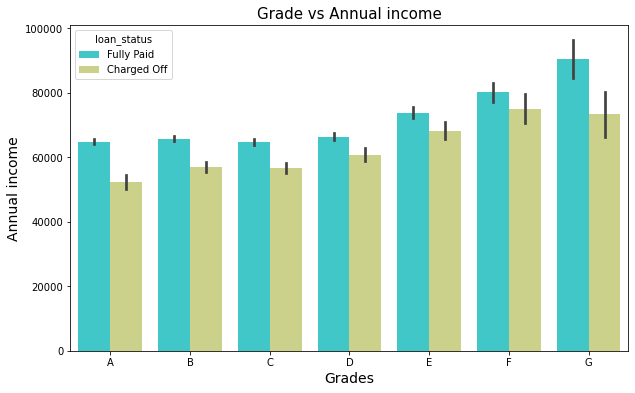

In [151]:
# Grades Vs Annual Income
plt.figure(figsize=(10,6))
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan_dataset, estimator=np.mean,order='ABCDEFG',palette='rainbow')
ax.set_title('Grade vs Annual income',fontsize=15,color='black')
ax.set_ylabel('Annual income',fontsize=14,color='black')
ax.set_xlabel('Grades',fontsize=14,color='black')
plt.show()

#Charged Off's are getting incresed with the grades and fully paid have higher income compared to Charged Off

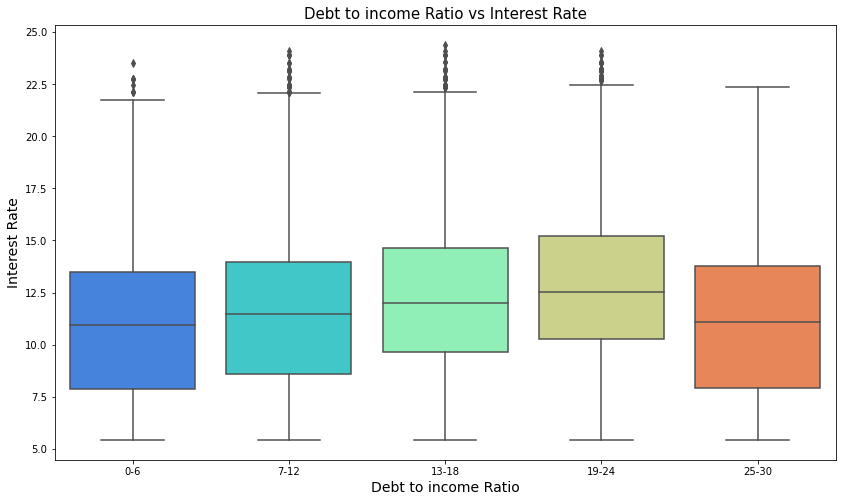

In [158]:
# Debt to Income Ratio Vs Interest Rate
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='dti_grp', data =loan_dataset,palette='rainbow')
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='black')
ax.set_ylabel('Interest Rate',fontsize=14,color='black')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color='black')
plt.show()
# The interest rates are increasing with higher Debt to income Ratio with exceptions from the highest DTI group category

# Observations:
###  The driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default are as follows from the above analysis:


1. We can see that almost 17% loans are charged off
2. The charged off is more in RENT and MORTGAGE category compared to owned as these applicants are more
3. Most of the borrowers taken loan for debt_consoldation and for credit card and thus charged off is also high for these purpose
4. Charged off is more for 36 months compared to 60 months, the time taken to pay back the loan
5. For Charged off- we can see that number of applicants are increasing from October to December every year so the deafults occured in those months
6. We can see that the annual income less than 60k will be more chances of likely to default. Maximum likely to default are in 31-60 K range
7. B grade is the highest grade who likely to default
8. The interesting fact is those who have taken the loan between 6k-10k will  likely to default
9. Most of the applicants who likely to default are fall under 13-18 DTI ratio 
10. Plot shows intrest rate is increasing slowly with increase in year
11. Charged Off's are getting incresed with the grades and fully paid have higher income compared to Charged Off
12. The interest rates are increasing with higher Debt to income Ratio with exceptions from the highest DTI group category